# Word count example

In this episode we will together build up a first Jupyter notebook and we will
try to create a computational narrative consisting of code, documentation,
equations, and a plot. At the same time we will introduce some Python concepts,
just enough to be able to adapt Python code written by somebody else.

We will prepare some building blocks which will help us to progress to more
advanced lessons such as [Analyzing Documents with
TF-IDF](https://programminghistorian.org/en/lessons/analyzing-documents-with-tfidf)
of the [Programming Historian](https://programminghistorian.org) lesson suite.

## Relevant formulas

- inverse document frequency: $\text{idf}_i = \ln [ (N + 1)/\text{df}_i ] + 1$

This is for a later episode and just as an example that it can be done.
At this stage it does not matter what this formula means.

## Basic types in Python

- Python is **dynamically typed**:
  We do not have to define that an integer is an {py:class}`int`, we can use it this way
  and Python will infer it
- However, one can use [type annotations](https://docs.python.org/3/library/typing.html) in Python
  (see also [mypy](http://mypy-lang.org/))
- Now you also know that we can add `# comments` to our code

In [11]:
# int
num_measurements = 13

# float
some_fraction = 0.25

# string
name = "Bruce Wayne"

# bool
value_is_missing = False
skip_verification = True

# we can print values
print(name)

# and we can do arithmetics with ints and floats
print(5 * num_measurements)
print(1.0 - some_fraction)

Bruce Wayne
65
0.75


## Data structures for collections: lists and dictionaries

Lists and dictionaries are the most used.
There are also sets and tuples but that is for another day.

In [12]:
# lists are good when order is important
scores = [13, 5, 2, 3, 4, 3]

# first element
print("first element is:", scores[0])

# we can add items to lists
scores.append(4)

# lists can be sorted
print("before sorting:", scores)
scores.sort()
print("after sorting:", scores)

first element is: 13
before sorting: [13, 5, 2, 3, 4, 3, 4]
after sorting: [2, 3, 3, 4, 4, 5, 13]


In [13]:
# dictionaries are useful if you want to look up
# elements in a collection by something else than position
word_count = {"the": 21, "of": 16, "her": 15, "she": 10}

print(word_count["her"])

# we can add items to dictionaries
word_count["and"] = 13
print(word_count)

if "and" in word_count:
    print("yes, the dictionary 'word_count' contains the key 'and'")
else:
    print("no, it doesn't")

15
{'the': 21, 'of': 16, 'her': 15, 'she': 10, 'and': 13}
yes, the dictionary 'word_count' contains the key 'and'


## Iterating over collections in Python

In [14]:
scores = [13, 5, 2, 3, 4, 3]

# iterating over a list
for score in scores:
    print(score)

# example with f-strings
for score in scores:
    print(f"the score is {score}")

# we don't have to call the variable inside the for-loop "score". this is up to us.
# we can do this instead
for x in scores:
    print(x)

13
5
2
3
4
3
the score is 13
the score is 5
the score is 2
the score is 3
the score is 4
the score is 3
13
5
2
3
4
3


In [15]:
word_count = {"the": 21, "of": 16, "her": 15, "she": 10}

# iterating over a dictionary
for key in word_count:
    print(word_count[key])

# another way to iterate
for (key, value) in word_count.items():
    print(key, value)

# and we can give them different names
for (word, count) in word_count.items():
    print(word, count)

21
16
15
10
the 21
of 16
her 15
she 10
the 21
of 16
her 15
she 10


## Functions are like reusable recipes

They receive ingredients (input arguments), then inside the function we do/compute something with these arguments, and they return a result.

Note the indentation which tells Python where the function starts and where it ends.

In [16]:
# here we define a function
def number_of_words(text: str) -> int:
    """
    Here we can describe the function:
    This function counts the number of words in text.
    """
    words = text.split()
    count = len(words)
    return count


# and later we can call the function
result = number_of_words("some example text")
print(result)

another_result = number_of_words("oh wow, too many new things to learn here")
print(another_result)

3
9


Let’s create another function, one that can read from a file:

In [17]:
# here we import a functionality from another Python module/package
from collections import Counter


def get_most_common(file_name: str, num_words: int) -> dict[str, int]:
    """
    Reads a file and returns a dictionary of num_words most common word counts.
    """
    with open(file_name, "r") as f:
        words = f.read().split()
        lowercase_words = [w.lower() for w in words]
        word_count = dict(Counter(lowercase_words).most_common(num_words))
    return word_count

In [18]:
# book.txt is an except from "All Around the Moon" by Jules Verne (public domain)
word_count = get_most_common(file_name="data/book.txt", num_words=10)
print(word_count)

{'the': 59, 'of': 44, 'a': 22, 'and': 17, 'in': 14, 'to': 13, 'no': 11, 'as': 11, 'by': 9, 'that': 8}


## Plotting the result

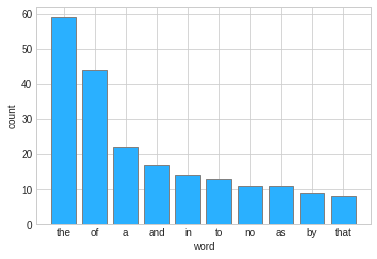

In [19]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')


def plot_histogram(data, x_label, y_label):
    fig, ax = plt.subplots()

    ax.bar(data.keys(), data.values(), facecolor="#2ab0ff", edgecolor="gray")

    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)


plot_histogram(word_count, "word", "count")

## Discussion

What do we get from this?

- With code separate from everything else, you might just send one
  number or a plot to your supervisor/collaborator for checking.
- With a notebook as a narratives, you send everything in a **consistent
  story**.
- A reader may still just read the introduction and conclusion, but
  they can easily see more - *and try changes themselves* - if they
  want.

Where should we add comments?

- We can comment code either in **Markdown cells** or in the code cell as **code comments**.

- What advantages do you see of commenting in Markdown cells and what advantages
  can you list for writing code comments in code cells?

## Reading error messages

- Instructor will introduce an error and we will together inspect it and learn how to "read" it.

## Recommendations

- Order of execution matters. Use "Run All Cells" before saving or sharing your notebook with others.
- To demonstrate this, the instructor can define a different `word_count` dictionary at the end of the notebook, run that cell, then run only the plotting cell.